PROYECTO BOOTCAMP DATA SCIENCE: "CREACION DE PROTAFOLIOS DE INVERSION CON MACHINE LEARNING"

1. ABSTRACT 

Este proyecto busca generar portafolios financieros mediante tecnicas de optimizacion para todo tipo de inversores con la facilidad de adaptarse a inversionistas adversos y no al riesgo. Por medio de tecnicas de machine learning se busca optimizar el tiempo en la eleccion de activos por medio de PYTHON. Se evalua la utilizacion de diferentes metodos y la abstraccion de herramientas que no se apegan a un solo metodo; se destaca la utilizacion de redes neuronales y otras herramientas de modelacion estadistica para cumplir con el fin de presentar informes atractivos a inversionistas y empresas. Tambien se efectuara un analisis de los tipos de inversion y plataformas para realizar las mismas. 

2. HIPOTESIS

- La programación en Python puede ser utilizada para automatizar la selección de los activos óptimos para la constuccion de un portafolio, lo que sugiere que mediante algoritmos y análisis de datos, es posible identificar y escoger los activos financieros más adecuados de manera eficiente y sistemática.
 - La aplicación de herramientas de redes neuronales en la generación y optimización de carteras de inversión presenta diversas posibilidades, siendo necesario investigar cuáles son las más adecuadas para este fin. Se plantea que diferentes metodologías, como las redes neuronales convolucionales, recurrentes o redes neuronales profundas, podrían ser efectivas para este propósito, y se requiere un análisis comparativo para determinar cuál ofrece la mejor relación entre rendimiento y complejidad computacional en la gestión de carteras de inversión.
- Cual es la metodologia o modelacion mas pertinente para el analisis de activos financieros 


3. ANALISIS EXPLORATORIO DE DATOS 

FINANZAS GRAFICOS DESCRIPTIVOS 

CARGO MEDIANTE PANDAS LOS DATOS FINANCIEROS 

In [3]:
import pandas as pd
import yfinance as yf

# Especifica los tickers de las acciones que deseas obtener
tickers = ['FTNT']

# Define el rango de fechas que deseas obtener
start_date = '2020-01-01'
end_date = '2024-04-10'

# Descarga los datos utilizando la función yf.download de yfinance
stock_data1 = yf.download(tickers, start=start_date, end=end_date)

# Visualiza los primeros registros del DataFrame resultante
print(stock_data1.head())


[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2020-01-02  21.520000  22.058001  21.476000  21.936001  21.936001  5541000
2020-01-03  21.684000  22.306000  21.620001  22.242001  22.242001  6641000
2020-01-06  22.122000  22.472000  21.906000  22.400000  22.400000  7369000
2020-01-07  22.466000  22.502001  22.214001  22.378000  22.378000  3796500
2020-01-08  22.389999  22.879999  22.360001  22.733999  22.733999  6953000


In [4]:
pip install matplotlib

CREACION DE LA GRAFICA POR MATPLOTLIB (para la acción)

Este grafico representara el comportamiento de los precios de cierre para las acciones para lo que permitira tener una idea de que tanto varia 

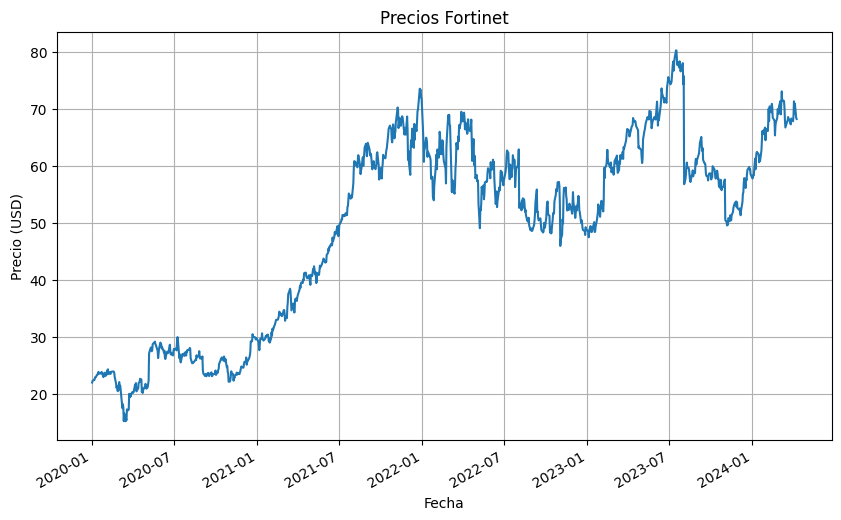

In [5]:
import matplotlib.pyplot as plt

# Grafica la serie de precios
stock_data1['Adj Close'].plot(figsize=(10, 6), title='Precios Fortinet')
plt.xlabel('Fecha')
plt.ylabel('Precio (USD)')
plt.grid(True)
plt.show()


In [6]:
pip install yfinance


PARA EL ANALISIS DE LA SERIE ES NECESARIO LA GRAFICACION DEL MERCADO PARA TENER UN PUNTO DE REFERENCIA 

Tambien se considera bastante util el general la graficacion del mercado dado que este es el punto de referencia para posteriormente comparar los niveles de riesgo, el sharpe entre otros. 

In [7]:
import pandas as pd
import yfinance as yf

# Especifica los tickers de las acciones que deseas obtener
tickers = ['NDAQ']

# Define el rango de fechas que deseas obtener
start_date = '2020-01-01'
end_date = '2024-04-10'

# Descarga los datos utilizando la función yf.download de yfinance
stock_data = yf.download(tickers, start=start_date, end=end_date)

# Visualiza los primeros registros del DataFrame resultante
print(stock_data.head())


[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2020-01-02  35.753334  35.986668  35.723331  35.939999  33.784294  1923900
2020-01-03  35.660000  36.160000  35.580002  36.093334  33.928436  2164800
2020-01-06  35.930000  36.086666  35.630001  36.070000  33.906498  2155200
2020-01-07  36.000000  36.086666  35.463333  35.473331  33.345619  1673100
2020-01-08  35.503334  35.653332  35.080002  35.276669  33.160755  3501000


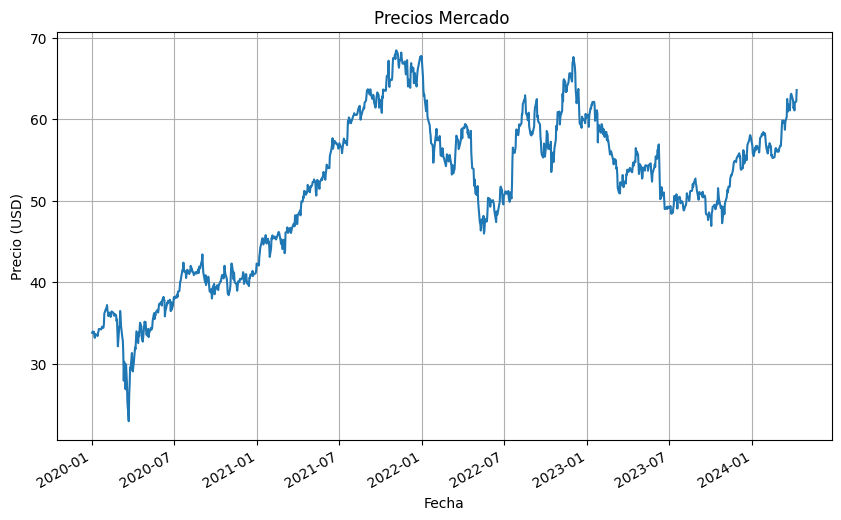

In [8]:
import matplotlib.pyplot as plt

# Grafica la serie de precios
stock_data['Adj Close'].plot(figsize=(10, 6), title='Precios Mercado ')
plt.xlabel('Fecha')
plt.ylabel('Precio (USD)')
plt.grid(True)
plt.show()


In [9]:

# Calcula la primera diferencia de los precios ajustados al cierre (Adj Close) de cada acción
stock_data_diff = stock_data1.diff()

# Elimina la primera fila que contendrá NaN ya que no hay un valor anterior para calcular la diferencia
stock_data_diff = stock_data_diff.dropna()

# Muestra los primeros registros del DataFrame resultante
print(stock_data_diff.head())


                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2020-01-03  0.164000  0.247999  0.144001  0.306000   0.306000  1100000.0
2020-01-06  0.438000  0.166000  0.285999  0.157999   0.157999   728000.0
2020-01-07  0.344000  0.030001  0.308001 -0.021999  -0.021999 -3572500.0
2020-01-08 -0.076000  0.377998  0.146000  0.355999   0.355999  3156500.0
2020-01-09  0.612001  0.276001  0.327999  0.162001   0.162001 -1476500.0


In [10]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


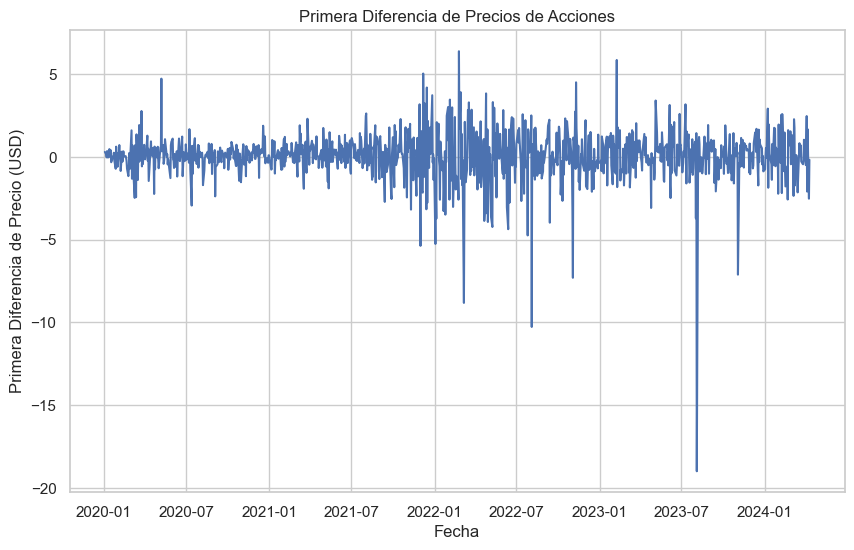

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configura el estilo de Seaborn
sns.set(style="whitegrid")

# Grafica la primera diferencia de los precios ajustados al cierre
plt.figure(figsize=(10, 6))
sns.lineplot(data=stock_data_diff['Adj Close'])
plt.title('Primera Diferencia de Precios de Acciones')
plt.xlabel('Fecha')
plt.ylabel('Primera Diferencia de Precio (USD)')
plt.show()


Para la modelacion de la serie financiera necesitamos que la serie tenga un componente estacionario ademas de que los datos con los que se va atrabajar deberian ser los rendimientos y no tanto los precios para lo que se saca una primera diferencia a partir de los precios y se genera los rendimientos. Esta grafica nos permite observar que la serie es estable en media para el caso de la acción de la empresa FORTINET dedicada al desarrollo y comercializacion de software 

In [12]:
# Calcula la primera diferencia de los precios ajustados al cierre (Adj Close) de cada acción
stock_data_diff1 = stock_data.diff()

# Elimina la primera fila que contendrá NaN ya que no hay un valor anterior para calcular la diferencia
stock_data_diff1 = stock_data_diff1.dropna()

# Muestra los primeros registros del DataFrame resultante
print(stock_data_diff1.head())


                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2020-01-03 -0.093334  0.173332 -0.143330  0.153336   0.144142   240900.0
2020-01-06  0.270000 -0.073334  0.049999 -0.023335  -0.021938    -9600.0
2020-01-07  0.070000  0.000000 -0.166668 -0.596668  -0.560879  -482100.0
2020-01-08 -0.496666 -0.433334 -0.383331 -0.196663  -0.184864  1827900.0
2020-01-09 -0.080002  0.310001  0.250000  0.506664   0.476265 -1911000.0


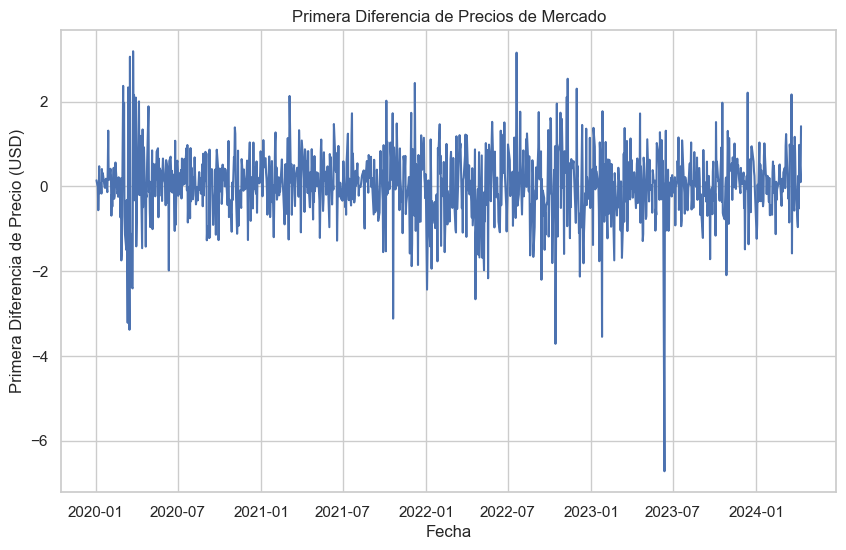

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configura el estilo de Seaborn
sns.set(style="whitegrid")

# Grafica la primera diferencia de los precios ajustados al cierre
plt.figure(figsize=(10, 6))
sns.lineplot(data=stock_data_diff1['Adj Close'])
plt.title('Primera Diferencia de Precios de Mercado')
plt.xlabel('Fecha')
plt.ylabel('Primera Diferencia de Precio (USD)')
plt.show()

In [15]:
print(stock_data_diff.head())

                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2020-01-03  0.164000  0.247999  0.144001  0.306000   0.306000  1100000.0
2020-01-06  0.438000  0.166000  0.285999  0.157999   0.157999   728000.0
2020-01-07  0.344000  0.030001  0.308001 -0.021999  -0.021999 -3572500.0
2020-01-08 -0.076000  0.377998  0.146000  0.355999   0.355999  3156500.0
2020-01-09  0.612001  0.276001  0.327999  0.162001   0.162001 -1476500.0


In [16]:
# Calcula la autocorrelación
autocorr = stock_data_diff ['Close'].autocorr()



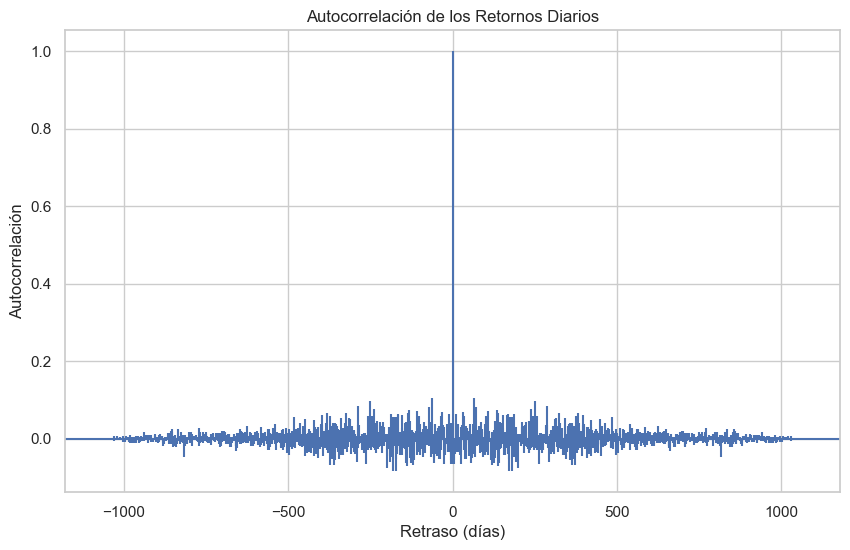

Autocorrelación de los retornos diarios: -0.06622285659222076


In [17]:
# Grafica la autocorrelación
plt.figure(figsize=(10, 6))
plt.acorr(stock_data_diff['Close'], maxlags=len(stock_data_diff)-1)
plt.title('Autocorrelación de los Retornos Diarios')
plt.xlabel('Retraso (días)')
plt.ylabel('Autocorrelación')
plt.grid(True)
plt.show()

print("Autocorrelación de los retornos diarios:", autocorr)

Como resultado de extraer la autocorrelacion para el activo financiero tenemos una autocorrelacion negativa lo que da indicios de una relacion inversa entre los valores de los retornos diarios por lo que cuando los retornos son altos en un dia tienden a ser bajos al siguiente dia. 

In [18]:
# Extrae solo los precios de cierre
closing_prices = stock_data1['Close']

# Calcula los retornos diarios
daily_returns = closing_prices.pct_change()

# Elimina el primer elemento que será NaN debido al cálculo de los retornos
daily_returns = daily_returns.dropna()

# Crea un DataFrame con los retornos diarios
returns_df = pd.DataFrame(daily_returns, columns=['Daily Returns'])

# Visualiza los primeros registros del DataFrame de retornos
print(returns_df.head())

Empty DataFrame
Columns: [Daily Returns]
Index: []


In [21]:
pip install arch


Note: you may need to restart the kernel to use updated packages.Collecting arch
     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     --------------------------------- ------ 51.2/60.6 kB ? eta -:--:--
     --------------------------------- ------ 51.2/60.6 kB ? eta -:--:--
     --------------------------------- ------ 51.2/60.6 kB ? eta -:--:--
     -------------------------------------- 60.6/60.6 kB 292.7 kB/s eta 0:00:00

   ---------------------------------------- 0.0/924.2 kB ? eta -:--:--
   ---------------------------------------- 10.2/924.2 kB ? eta -:--:--
   - ------------------------------------- 30.7/924.2 kB 330.3 kB/s eta 0:00:03
   - ------------------------------------- 41.0/924.2 kB 281.8 kB/s eta 0:00:04
   -- ------------------------------------ 61.4/924.2 kB 328.2 kB/s eta 0:00:03
   ---- --------------------------------- 112.6/924.2 kB 409.6 kB/s eta 0:00:02
   ----- -------------------------------- 122.9/924.2 kB 400.9 kB/s eta 0:00:02
   -

In [22]:
import warnings
from arch import arch_model
import pandas as pd
import yfinance as yf

def fit_garch_models(returns):
    models = ["GARCH", "EGARCH", "GJRGARCH"]
    best_aic = float("inf")
    best_model = None
    
    for model_type in models:
        try:
            model = arch_model(returns, vol=model_type, mean="Zero")
            fit = model.fit(disp="off")
            aic = fit.aic
            if aic < best_aic:
                best_aic = aic
                best_model = {"fit": fit, "aic": aic, "model_type": model_type, "spec": model}
        except Exception as e:
            warnings.warn(f"Error al ajustar el modelo {model_type}: {str(e)}")

    return best_model

# Especifica los tickers de las acciones que deseas obtener
tickers = ['FTNT']

# Define el rango de fechas que deseas obtener
start_date = '2020-01-01'
end_date = '2024-04-10'

# Descarga los datos utilizando la función yf.download de yfinance
stock_data1 = yf.download(tickers, start=start_date, end=end_date)

# Extrae solo los precios de cierre
closing_prices = stock_data1['Close']

# Calcula los retornos diarios
daily_returns = closing_prices.pct_change()

# Elimina el primer elemento que será NaN debido al cálculo de los retornos
daily_returns = daily_returns.dropna()

# Ajusta los modelos GARCH y encuentra el mejor modelo según AIC
best_model = fit_garch_models(daily_returns)

# Imprime los resultados
print("Mejor modelo según AIC:", best_model["model_type"])
print("AIC:", best_model["aic"])


[*********************100%%**********************]  1 of 1 completed
c:\python\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0008497. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Mejor modelo según AIC: EGARCH
AIC: -4639.7665693691215


c:\python\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0008497. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\acer\AppData\Local\Temp\ipykernel_6636\1623518544.py:20: UserWarning: Error al ajustar el modelo GJRGARCH: Unknown model type in vol
  warnings.warn(f"Error al ajustar el modelo {model_type}: {str(e)}")


Nota: profe quisiera predirle el favor si puede revisar este codigo es con el objetivo de hacer los modelos de la familia de los GARCH y que el codigo arroje el mejor modelo posible segun esto el mejor modelo es el EGARCH no se si el codigo este funcionando bien. Es a partir de este tipo de codigos que me gustaria ir escofiendo los mejores activos financieros para la conformacion de un portafolio de inversion. 

4. RECOMENDACIONES 
* Se observa necesario el analisis del sharpe dentro del analisis exploratorio de  datos 
* Se ve necesario el observar otros activos financieros, se intentara hacer un codigo que pueda elegirlos mediante machine learning 


5. DEFINICION DEL PROYECTO 

5.1 OBJETIVO: Desarrollar un algoritmo de optimización de carteras de inversión que maximice el rendimiento y minimice el riesgo, utilizando programación de códigos y análisis financiero.

5.2 CONTEXTO COMERCIAL:En el mundo financiero actual, la gestión eficiente de las carteras de inversión es fundamental para maximizar los rendimientos y mitigar los riesgos. Los inversores buscan constantemente herramientas y estrategias que les permitan tomar decisiones informadas y optimizar sus carteras de acuerdo con sus objetivos financieros.

5.3 CONTEXTO ANALITICO: En el ámbito del análisis financiero, la optimización de carteras es un problema fundamental que implica encontrar la combinación óptima de activos que maximice el rendimiento esperado mientras se minimiza el riesgo. Tradicionalmente, este problema se aborda mediante métodos de optimización matemática, como la teoría moderna de carteras de Markowitz.
Sin embargo, estos métodos pueden ser computacionalmente intensivos y pueden no ser adecuados para gestionar carteras grandes o en entornos de mercado dinámicos. Es aquí donde entra en juego la programación de códigos y el análisis financiero avanzado.
Al desarrollar un algoritmo de optimización de carteras basado en programación de códigos, se puede aprovechar técnicas y herramientas de análisis de datos para procesar grandes volúmenes de información y tomar decisiones de inversión más rápidas y precisas. Esto implica la aplicación de modelos estadísticos y algoritmos de aprendizaje automático para identificar patrones en los datos del mercado y predecir el comportamiento futuro de los activos.
Además, el uso de la programación de códigos te permite crear un sistema flexible y personalizable que puede adaptarse a las necesidades y preferencias específicas de cada inversor o entidad financiera. Esto incluye la capacidad de incorporar restricciones personalizadas, como límites de exposición sectorial o restricciones éticas, en el proceso de optimización de la cartera.